# UFO Sightings  

This report is according to the record of the current time Feb 9, 2020 at 22:50pm eastern time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
pd.reset_option("^display")
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 3000)

In [31]:
data = pd.read_csv('https://query.data.world/s/6gpu52qx6tvuhn6hfk36amymhxrzlx', encoding = 'latin_1')
data = pd.DataFrame(data)

In [4]:
data.rename(columns = {'city_latitude':'latitude', 'city_longitude':'longitude'}, inplace = True)

Shape of observed UFOs

In [5]:
data['shape'].unique()

array(['light', 'circle', nan, 'teardrop', 'cigar', 'disk', 'unknown',
       'oval', 'other', 'sphere', 'changing', 'formation', 'flash',
       'chevron', 'triangle', 'cylinder', 'fireball', 'diamond', 'egg',
       'cross', 'rectangle', 'cone'], dtype=object)

Making a dictionary of UFO shapes

In [6]:
data_shape = {0:0, 'light':1, 'circle':2, 'teardrop':3, 'cigar':4, 'disk':5, 'unknown':6,
       'oval':7, 'other':8, 'sphere':9, 'changing':10, 'formation':11, 'flash':12,
       'chevron':13, 'triangle':14, 'cylinder':15, 'fireball':16, 'diamond':17, 'egg':18,
       'cross':19, 'rectangle':20, 'cone':21}

In [7]:
data['shape_n'] = data['shape']

Converting NaN values to 0

In [8]:
data['shape_n'] = data['shape_n'].fillna(0)

Adding a new column of numbers according to the UFO shapes and the dictionary

In [9]:
data['shape_n'] = [data_shape[item] for item in data.shape_n]

### Viewing the longitude and latitude on a map

In [10]:
data

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,latitude,longitude,shape_n
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582,1
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300,2
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN,0
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501,3
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02T20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04T00:00:00,33.414036,-111.920920,11
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02T20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04T00:00:00,37.642200,-93.399600,1
88122,I just witnessed a âPhoenix Lightsâ type o...,North Port,FL,2019-10-02T20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04T00:00:00,27.076210,-82.223280,11
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02T22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04T00:00:00,35.605000,-82.313200,16


we can see the locations of those cities where people have reported the UFOs

preparaing datetime values for analysis

In [11]:
data['date_time'] = pd.to_datetime(data['date_time'], format = '%Y-%m-%dT%H:%M:%S', utc = False)

In [12]:
data['posted'] = pd.to_datetime(data['posted'], format = '%Y-%m-%dT%H:%M:%S', utc = False)

Distribution of UFO sightings in US states, we can see in all states UFOs have been reported.

In [13]:
data.groupby('state').describe()

latitude                                                                                 longitude                                                                                       shape_n                                                 
         count       mean           std        min        25%        50%        75%        max     count        mean           std         min         25%         50%         75%         max   count      mean       std  min   25%  50%    75%   max
state                                                                                                                                                                                                                                                  
AB       338.0  52.490974  1.633346e+00  49.483300  51.042379  52.883300  53.522989  56.709217     338.0 -113.933591  1.596169e+00 -118.851542 -114.057442 -113.809083 -113.503961 -110.201700   381.0  7.162730  5.706854  0.0  1.00  6.0  12.00  21.0
AK       365.0  61.578837  2.107747e+00  55.144300  61.181960  61.181960  61.609200  64.845276     365.0 -148.749332  5.193339e+00 -170.494000 -149.842527 -149.542104 -147.834739 -131.498400   419.0  6.821002  5.657187  0.0  1.00  6.0  11.00  21.0
AL       730.0  33.043815  1.488343e+00  30.247000  31.892867  33.480916  34.315375  34.958000     730.0  -86.779876  8.287389e-01  -88.331300  -87.544545  -86.754149  -86.239825  -85.064643   869.0  7.410817  5.843617  0.0  1.00  6.0  14.00  21.0
AR       548.0  35.346786  7.977660e-01  33.147800  34.802190  35.353695  36.047872  36.451700     548.0  -92.847470  1.167349e+00  -94.489300  -94.044538  -92.697200  -92.363192  -89.904600   669.0  6.880419  5.668279  0.0  1.00  6.0  12.00  21.0
AZ      2534.0  33.457325  8.294997e-01  31.450200  33.247020  33.535381  33.603356  36.718100    2534.0 -111.959838  9.428309e-01 -114.590884 -112.194392 -111.920920 -111.633293 -109.052600  2893.0  7.220187  5.669638  0.0  2.00  6.0  11.00  21.0
BC       409.0  49.685697  1.491053e+00  48.374600  49.130311  49.268926  49.866000  58.816700     409.0 -122.336319  2.171776e+00 -130.320100 -123.383972 -122.979216 -121.959960 -114.885400   473.0  6.621564  5.353452  0.0  1.00  6.0  10.00  21.0
CA      8638.0  35.631687  2.234418e+00  32.552000  33.847008  34.296575  37.769992  41.910100    8638.0 -119.451895  2.077900e+00 -124.265400 -121.555450 -118.509617 -117.757725 -114.336900  9506.0  7.444877  5.677494  0.0  2.00  7.0  12.00  21.0
CO      1643.0  39.550693  7.255826e-01  37.107500  39.076032  39.740547  40.024404  40.875700    1643.0 -105.313563  1.019671e+00 -108.727100 -105.197630 -105.010230 -104.792967 -102.215800  1888.0  7.502119  5.535260  0.0  2.00  7.0  12.00  21.0
CT      1254.0  41.505378  2.464273e-01  41.022900  41.308300  41.524300  41.685712  42.022000    1254.0  -72.864169  4.037839e-01  -73.642755  -73.129021  -72.873500  -72.641300  -71.808400  1335.0  7.382022  6.041161  0.0  2.00  6.0  14.00  21.0
DC        75.0  38.907575  1.430655e-14  38.907575  38.907575  38.907575  38.907575  38.907575      75.0  -77.024999  1.001459e-13  -77.024999  -77.024999  -77.024999  -77.024999  -77.024999    87.0  8.068966  5.584016  0.0  2.00  8.0  12.50  21.0
DE       215.0  39.124203  2.261048e+00   6.800000  38.824000  39.475700  39.651958  39.804100     215.0  -75.436113  1.200360e+00  -75.712143  -75.691050  -75.566021  -75.434800  -58.166700   262.0  7.916031  5.734266  0.0  2.00  8.0  14.00  21.0
FL      4467.0  27.943462  1.399308e+00  24.584803  26.705045  28.006814  28.701000  30.953700    4467.0  -81.753600  1.464008e+00  -87.333600  -82.433929  -81.616373  -80.605100  -80.038000  5294.0  7.540990  5.790515  0.0  2.00  7.0  14.00  21.0
GA      1602.0  33.449455  1.009621e+00  30.751900  32.868500  33.808706  34.051500  42.335800    1602.0  -83.777448  2.146635e+00  -85.520600  -84.494199  -84.139467  -83.571500   -8.596200  1770.0  7.246328  5.683403  0.0  2.00  6.0  12.00  21.0
HI       258.0  21.088016  6.245988e-0

Number of total observed objects 70113

In [14]:
data.groupby('shape').describe().sum()

latitude   count    70113.000000
           mean       808.005000
           std        118.289827
           min        206.430595
           25%        718.745754
           50%        820.331212
           75%        883.979793
           max       1321.626824
longitude  count    70113.000000
           mean     -1987.539721
           std        380.057928
           min      -3354.962292
           25%      -2358.488247
           50%      -1869.804253
           75%      -1685.495516
           max       -579.067857
shape_n    count    85627.000000
           mean       231.000000
           std          0.000000
           min        231.000000
           25%        231.000000
           50%        231.000000
           75%        231.000000
           max        231.000000
dtype: float64

Shape of UFOs and number of them

In [15]:
data.groupby('shape').describe()

latitude                                                                             longitude                                                                                  shape_n                                         
             count       mean       std        min        25%        50%        75%        max     count       mean        std         min         25%        50%        75%         max    count  mean  std   min   25%   50%   75%   max
shape                                                                                                                                                                                                                                     
changing    1751.0  38.143679  5.892499 -31.966300  33.939643  38.575802  41.879912  61.537579    1751.0 -97.108742  18.881921 -157.840129 -117.021991 -93.030556 -81.538650  115.862472   2112.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
chevron      793.0  38.278480  5.980486 -32.055500  34.296575  38.814200  41.928700  61.214900     793.0 -95.949039  18.717621 -156.626716 -112.842200 -93.092252 -81.335534  115.847400    953.0  13.0  0.0  13.0  13.0  13.0  13.0  13.0
cigar       1602.0  38.251018  5.358988  19.930500  34.238375  38.861478  41.879912  61.214900    1602.0 -92.715275  17.276650 -159.391100 -106.612475 -86.779469 -79.815072  -63.551598   1990.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0
circle      8220.0  38.500752  5.842638 -32.055500  34.129985  39.182854  42.180122  64.845276    8220.0 -93.658760  18.482143 -161.800600 -111.920920 -87.668018 -79.662904  116.000000  10130.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0
cone         274.0  38.469821  5.389860  21.322600  34.904694  39.028100  41.670103  60.055200     274.0 -97.112324  18.751409 -157.840129 -114.874130 -93.259654 -81.222073  -64.792902    349.0  21.0  0.0  21.0  21.0  21.0  21.0  21.0
cross        241.0  38.447219  5.207775  26.134200  34.113981  39.169214  42.282500  61.537579     241.0 -92.462849  17.856426 -149.542104 -110.181607 -85.783500 -79.245122  -69.014200    289.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0
cylinder    1131.0  38.377305  5.503304  21.322600  34.740305  38.825100  41.867762  61.609200    1131.0 -93.462226  17.638015 -157.840129 -109.487500 -87.361034 -80.289519  -60.193148   1374.0  15.0  0.0  15.0  15.0  15.0  15.0  15.0
diamond     1028.0  38.829735  5.739350   6.800000  34.330450  39.187982  42.287450  64.845276    1028.0 -94.331875  18.325341 -159.391100 -114.275295 -87.959985 -79.813310  -58.166700   1273.0  17.0  0.0  17.0  17.0  17.0  17.0  17.0
disk        3490.0  38.516134  5.620906  20.880451  34.276984  39.029685  41.887728  64.845276    3490.0 -94.509996  17.996463 -170.494000 -112.049460 -88.047288 -80.135140  -62.713700   4522.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0
egg          513.0  38.348350  5.361173  19.460100  34.050707  39.201460  41.866100  53.522989     513.0 -93.988192  17.982578 -157.840129 -112.005873 -87.860800 -79.414188  -64.144800    666.0  18.0  0.0  18.0  18.0  18.0  18.0  18.0
fireball    5915.0  38.444658  5.747505  19.870300  34.050707  39.484114  42.225300  64.845276    5915.0 -93.203744  18.088408 -157.840129 -111.933398 -86.403412 -79.753814  -59.957000   7095.0  16.0  0.0  16.0  16.0  16.0  16.0  16.0
flash       1376.0  38.810941  5.984284  19.268700  34.179411  39.313073  42.505992  64.845276    1376.0 -96.552591  18.863325 -158.173000 -116.088917 -91.296200 -80.680561  -57.805137   1675.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0
formation   2336.0  38.617458  5.629447  20.698900  34.168160  39.173754  42.277100  64.845276    2336.0 -95.752303  17.834737 -158.173000 -112.452994 -90.308528 -80.660400  -59.957000   2842.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0
light      15103.0  38.701853  5.799557  19.268700  34.170200  39.205800  42.406950  64.845276   15103.0 -95.247669  18.400043 -170.494000 -113.503961 -89.055300 -80.289519  -53.295300  18230.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0
other       465

Shape of UFOs seen by people in different states. We can see number of reports in California, Florida, and Washington are a lot higher than others.

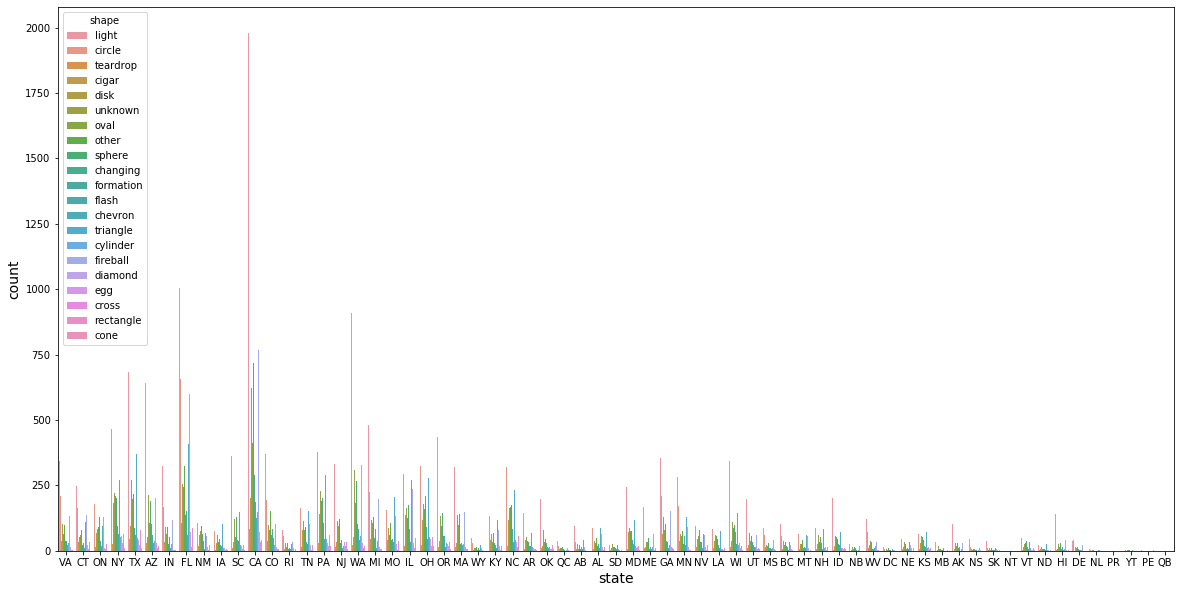

In [16]:
plt.figure(figsize = (20,10))
sns.countplot(data=data, x = 'state', hue = 'shape')
plt.xlabel('state', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

We can see number of reports according to the state and year of the report. As we can see people have reported the UFO sightings from 50 years ago started by 1969 to 2019 and in the last 9 years the number of reports have jumped significantly in comparison with the previous 41 years.

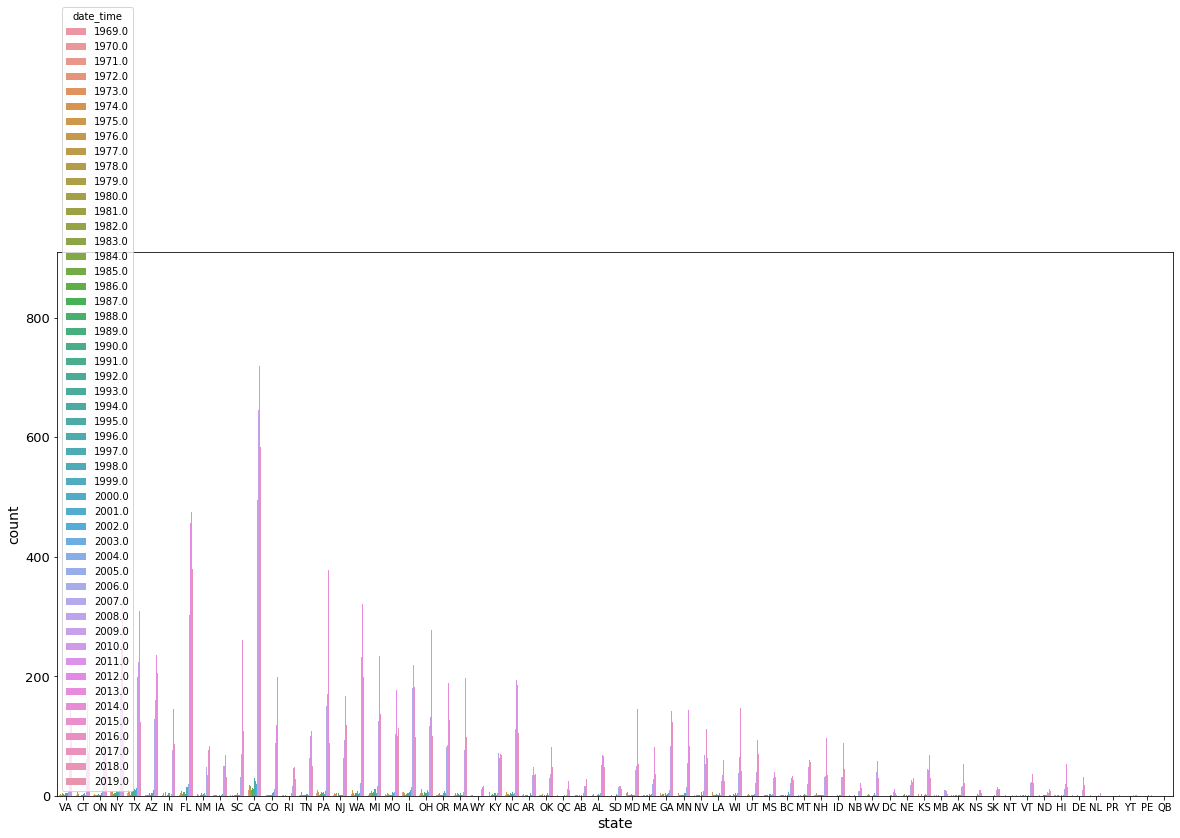

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x = 'state', hue = data['date_time'].dt.year)
plt.xlabel('state', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.yticks(fontsize=13)
plt.show()

As we can see number of reports in California, Florida, and Washington were higher in October, December, and July, while in most of other states the number of reports were higher in mid months of the year like May, June, also July.

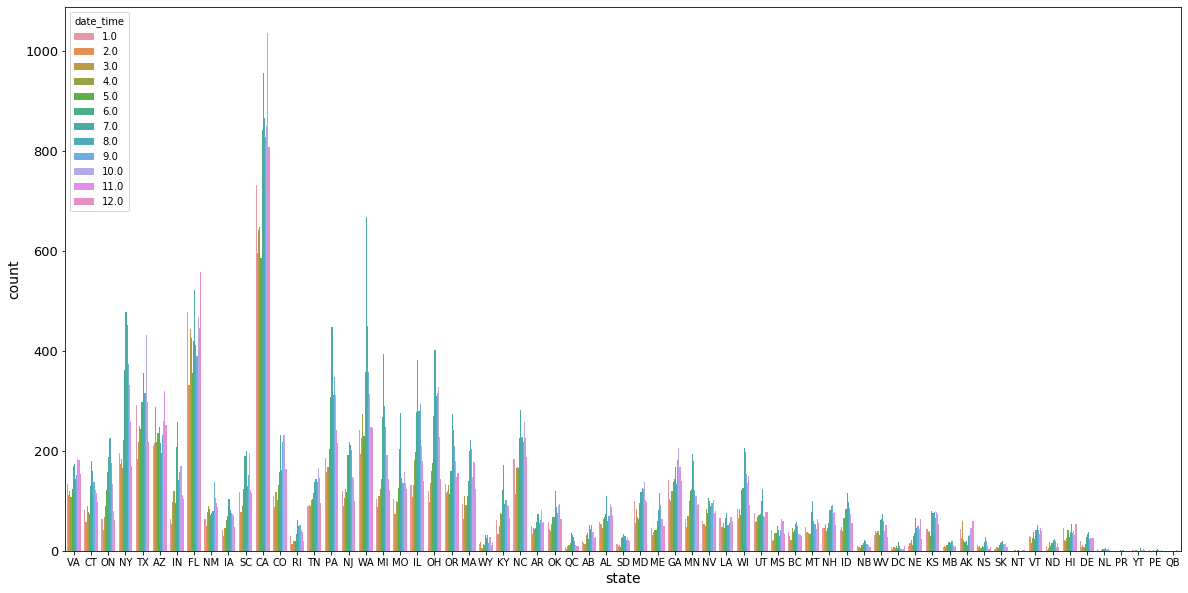

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x = 'state', hue = data['date_time'].dt.month)
plt.xlabel('state', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.yticks(fontsize=13)
plt.show()

We can see number of reports were higher from 9pm till 1am and more specifically around midnight.

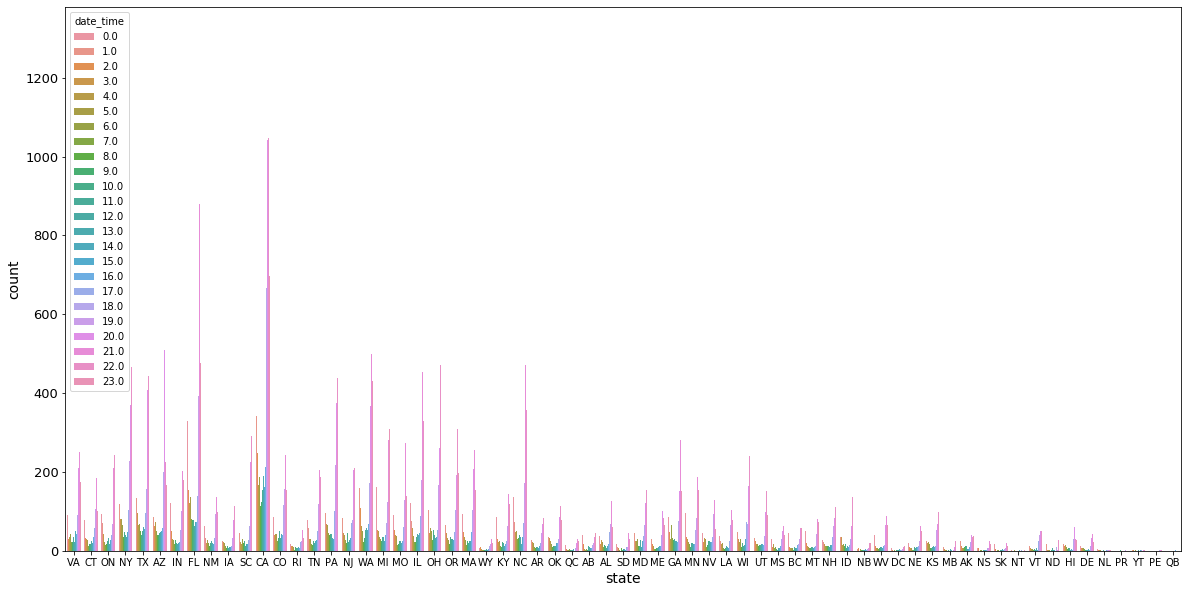

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x = 'state', hue = data['date_time'].dt.hour)
plt.xlabel('state', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.yticks(fontsize=13)
plt.show()

We can see number of reports from 2005 to 2006 have jumped significantly which truly means something has happened at that time. Also most of people have seen the UFOs as light, circle, disk, oval, chevron, triangle, and cylinder. 

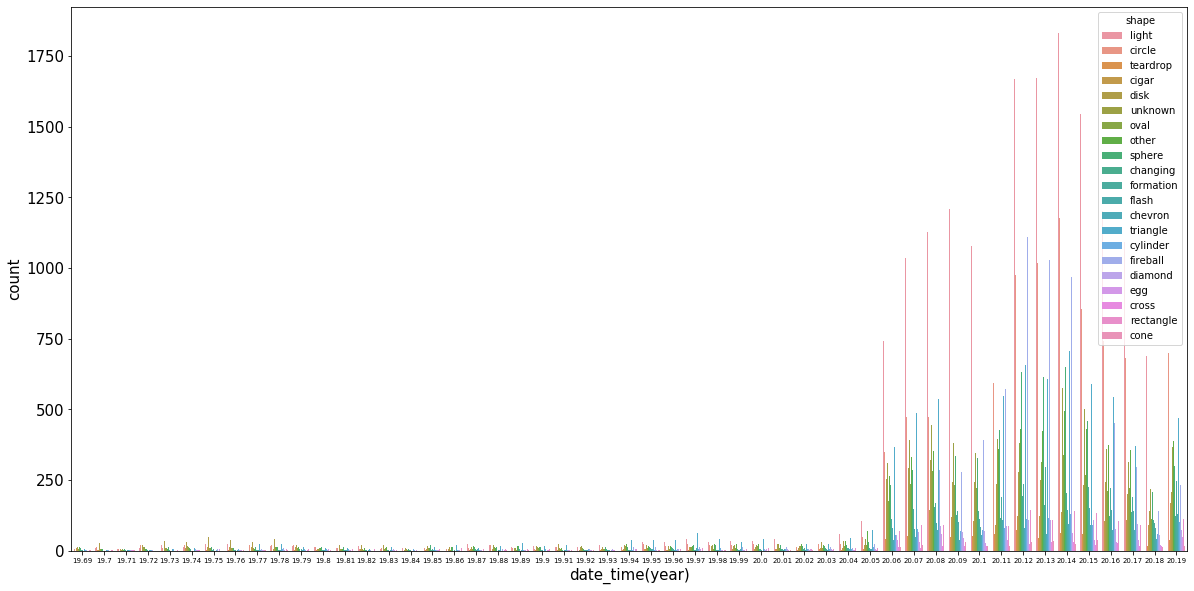

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x = data['date_time'].dt.year/100, hue = 'shape')
plt.xlabel('date_time(year)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(fontsize=7)
plt.yticks(fontsize=15)
plt.show()

People have seen the UFOs in 2nd half of the year more than the first, more specifically the reports were higher in July and August, and the type of the UFOs were light, triangle, circle, disk, and fireball. 

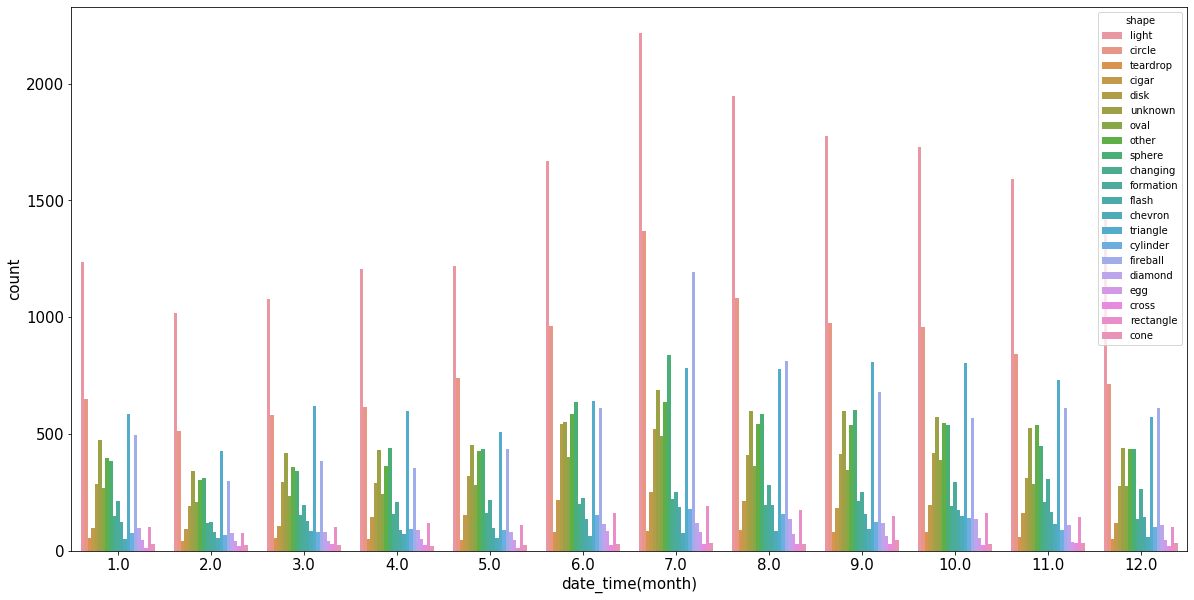

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x = data['date_time'].dt.month, hue = 'shape')
plt.xlabel('date_time(month)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Most of the reports were on Saturday, Sunday, and Friday than the other days. So, more on weekend time.

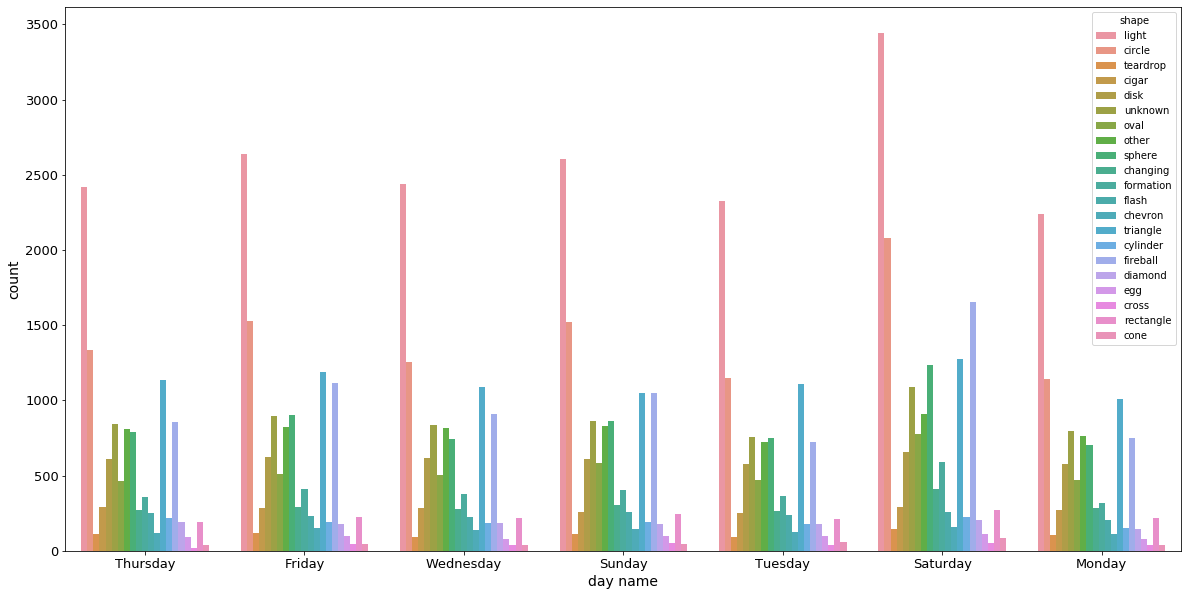

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x = data['date_time'].dt.day_name(), hue = 'shape')
plt.xlabel('day name', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

Most of reports were a lot higher in week 27 to 41, 47, and 50, except week 36. Also number of reports had a significant drop in weeks 7, 8, 9, 10, 42, 43, 44, 45, and specially 53. Also most of them were just light.

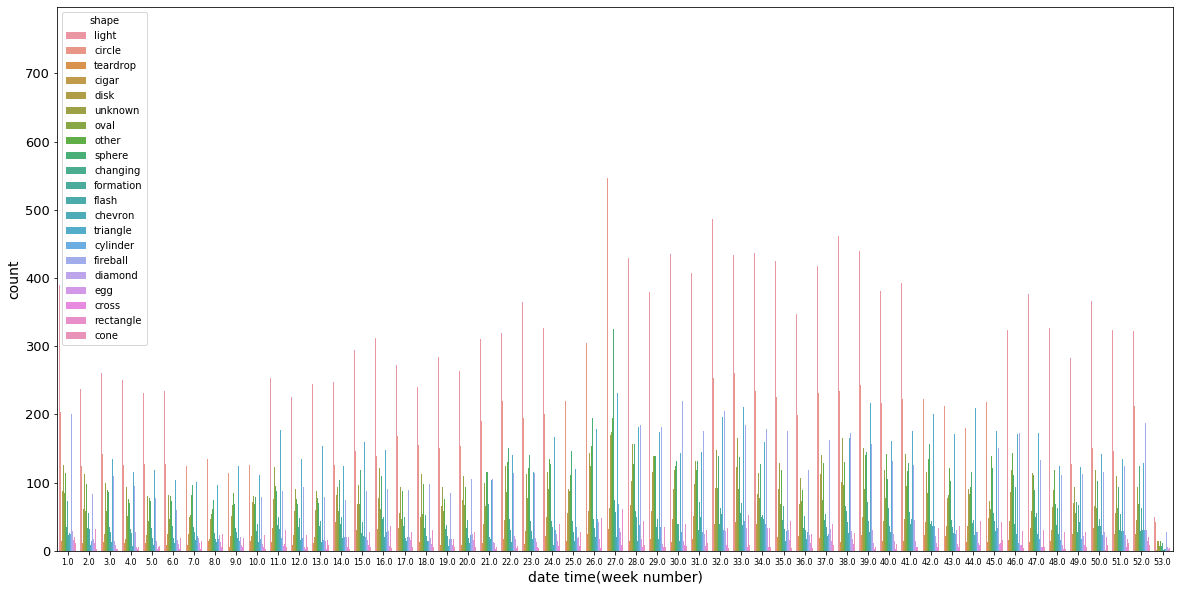

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x = data['date_time'].dt.week, hue = 'shape')
plt.xlabel('date time(week number)', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=13)
plt.show()

The word count here shows what words has been used more than the others in the summary that people have provided

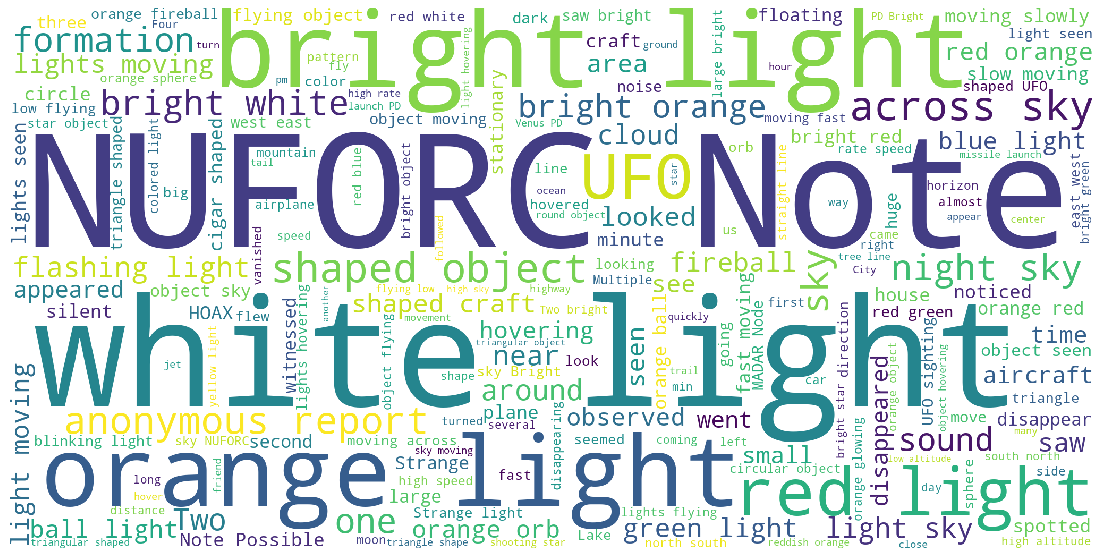

In [24]:
words = [i for i in data.summary.dropna()]
    
words = " ".join(words)

plt.subplots(figsize=(20,10))

wordcloud = WordCloud(background_color='white',
                      width=2048,
                      height=1024
                     ).generate(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# <font color = red> Another type of text processing by Natural Language Processing </font>

In [110]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eatthis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
data['summary'].fillna('', inplace=True)

In [112]:
data['text'].fillna('', inplace=True)

In [113]:
data['stats'].fillna('', inplace=True)

In [155]:
data['duration'].fillna('', inplace=True)

In [145]:
def unique_content(dataframe, datacolumn):
    results = []
    for i in dataframe.index:
        pre = re.sub("[^a-zA-Z]'", ' ',dataframe[datacolumn][i])
        pre = pre.lower()
        pre = pre.split()
        ps = PorterStemmer()
        pre = [ps.stem(word) for word in pre if not word in set(stopwords.words('english'))]
        pre = ' '.join(pre)
        results.append(pre)
    return results

In [150]:
def report(content):
    unique_summary, counts_summary = np.unique(content, return_counts=True)
    print("Frequency of unique values of the said array:")
    print(np.asarray((unique_summary, counts_summary)))
    return content

In [151]:
summary = unique_content(data, 'summary')
report(summary)

Frequency of unique values of the said array:
[['' '" bright light seen sky came went hous disappeared, sound"'
  '" transluc "white morph object straight flight path' ...
  'â\x80\x9cphoenix lightsâ\x80\x9d louisiana, new year night.'
  'â\x80\x9cstarâ\x80\x9d sundown star out; instantli becam brighter; white cloud like explosion; object shot out.'
  'â\x80¢ june 6, 2018 mesa, arizona â\x80¢ went porch smoke 2a.m.']
 ['36' '1' '1' ... '1' '1' '1']]


['wife drive southeast fairli popul main side road, dark side 6:43pm, wife exclaimedâ\x80\x9d fallin',
 'think may caught ufo nbc nightli news air march 21st 22nd.',
 'woke late afternoon 3:30-4pm. went bath, shave leg notic indent around left ankel.',
 'drive toward intersect fallowfield eagleson saw streak sky like fall plane somethi',
 'peoria arizona, saw cigar shape craft float neighborhood 500 feet silent, emit brilliant colors,',
 'object flash light green, blue, red, white. light revolv around object. object hovers.',
 'descript washington dc event 50â\x80\x99 glitter type object .',
 'apr. 10th wit bright silveri round object hover near zenith commun look like bright star.',
 'ufo report irv texa 2200 hrs. juli 1973 1974.',
 'group light format sweep thru night sky',
 'metal orb wire seen telescop notic bright light hover sky. ((anonym report))',
 '2 tini light record minute. watch top light bolt higher lower light semi-circle.',
 'drive saw three glow orb best describ it. dri

In [152]:
text = unique_content(data, 'text')
report(text)

Frequency of unique values of the said array:
[[''
  '! audit "the moon" backdrop pictur album cover. object full metal levit triangl shape object. one adamt object/ basic hoover mountain rocki observing.'
  "!5-20 orang light nw suburb chicago. take walk busi street head northwest, saw aprox 15 orang light sky north. first straight line, thought might plane line land ohar airport. i'v live near airport entir life, quickli realiz case. color light right quickli left line format becam jumbl random pattern. 5 light seem form circle, rest disappear one one one left sky 30 second disappeared. never made claim like hope someon els saw this. would hard believ brightness, number objects, residenti area, happen one els did."
  ...
  'â\x80\x9cstarâ\x80\x9d sundown star out; instantli becam brighter; white cloud like explosion; object shot wife wit event appear explos high aircraft even spacecraft. report 911 observ it. 911 oper call back 40 minut later advis report sight faa suggest submit rep

['wife drive southeast fairli popul main side road, dark side 6:43pm, wife exclaimedâ\x80\x9d fall star babi look quick!â\x80\x9d look saw fall star bright ball light , one closer shoot star ever seen, blue glow chang green color light fell sky. fell fall invis open sky... night crystal clear night sky cloud precipit obstruct view object closer ever wit before. way object fell slow meteor fall star, also note â\x80\x9clight trailâ\x80\x9d follow behind object fell. watch fall 5 second disappear dark night sky somewher close earth surface. strangest light; object; ufo... encount felt duti report it.',
 'think may caught ufo nbc nightli news air march 21st 22nd. short clip boe 747, plane fli left right, see black circular object fli eradic (sic. erraticly)) behind tail wing, iâ\x80\x99m guess distanc 25-30 feet. slow video home object so.',
 'woke late afternoon 3:30-4pm. went bath, shave leg notic indent around left ankel. notic went way around back leg thighs. scare night tell fiance p

In [153]:
stats = unique_content(data, 'stats')
report(stats)

Frequency of unique values of the said array:
[[''
  'occur : (enter : --) reported: 12/27/2013 2:31:11 pm 14:31 posted: 1/10/2014 location: monument, co shape: chang duration:8-12 minut'
  'occur : (enter : 1980 & now) reported: 6/27/2001 13:16 posted: 8/24/2010 location: charlestown, ri shape: disk duration:10 minut max.'
  ...
  'occur : reported: 9/16/2019 7:24:46 07:24 posted: 9/19/2019 location: hooper, co shape: circl duration:1 minut'
  'occur : reported: 9/23/2017 7:57:59 pm 19:57 posted: 9/28/2017 location: hellertown, pa shape: duration:2 second'
  'occur : reported: 9/24/2016 2:23:44 pm 14:23 posted: 9/30/2016 location: , shape: duration:']
 ['37' '1' '1' ... '1' '1' '1']]


['occur : 12/12/2019 18:43 (enter : 12/12/19 18:43) reported: 12/19/2019 7:19:31 pm 19:19 posted: 12/22/2019 location: chester, va shape: light duration:5 second',
 'occur : 3/22/2019 18:30 (enter : 03/22/19 18:30) reported: 3/27/2019 4:10:19 pm 16:10 posted: 3/29/2019 location: rocki hill, ct shape: circl duration:3-5 second',
 'occur : 4/1/2019 15:45 (enter : april01.19) reported: 4/8/2019 9:42:31 pm 21:42 posted: 4/12/2019 location: winnipeg (canada), shape: duration:',
 'occur : 4/17/2019 02:00 (enter : 04-17-2019 2:00) reported: 4/17/2019 8:41:25 08:41 posted: 4/18/2019 location: ottawa (carleton) (canada), shape: teardrop duration:10 second',
 'occur : 3/15/2009 18:00 (enter : 03/15/09 18:00) reported: 4/17/2019 6:30:52 pm 18:30 posted: 4/18/2019 location: peoria, ny shape: cigar duration:2 minut',
 'occur : 4/2/2019 20:25 (enter : 04/02/2019 20:25) reported: 4/3/2019 6:36:52 pm 18:36 posted: 4/8/2019 location: kirbyville, tx shape: disk duration:15 minut',
 'occur : 5/1/2019 11:

In [156]:
duration = unique_content(data, 'duration')
report(duration)

Frequency of unique values of the said array:
[['' '! minut' '!minut' ... '~t 6:00 minut' '~two minut' 'â±10 minut']
 ['3207' '1' '1' ... '1' '1' '1']]


['5 second',
 '3-5 second',
 '',
 '10 second',
 '2 minut',
 '15 minut',
 '5 minut',
 '10 minut',
 '6 minut',
 '19:00 19:30',
 '1 hour',
 'hour',
 'minut',
 '2 minut',
 '1 hour',
 '5 minut',
 '20 minut',
 '30 second',
 '20 minut',
 '40 second',
 '5 minut',
 '30 second',
 '3 second',
 '3 minut',
 '3 minut',
 '',
 'first 3min secon 3 min.',
 '1 minut',
 '',
 '30 minit',
 'mani hour',
 '2x ~10sec',
 'minut',
 '1 min.',
 '>1 minut',
 'unkn',
 'hour',
 'one half hour',
 '10 minut',
 'sever hrs.',
 '24 hour',
 '3 second',
 '15-30 min',
 '30 minut',
 '1 hour plu',
 '2 minut',
 '1 minut',
 'second',
 '5 minut',
 '20 minut',
 'time stop',
 '5-10 second',
 '20 second',
 '10 20 sec.',
 '5 minut',
 '30 45 minut',
 '15 minut',
 'know',
 '5 min.',
 '5 second',
 '2 min.',
 '3 minut',
 '3 second',
 '2 minut',
 '3 minut',
 '2 second',
 '3 min',
 'minut',
 '3hr',
 '15min+',
 '1 hour',
 'one hour',
 '5 minut',
 '3-4minut',
 '1 minut',
 '1 minut',
 '5 minut',
 '17 minut',
 '',
 '2 minut',
 '30 second',
 '1

# To be continued ....

# Conclusion

- Most of UFO sightings were in California, Washington, and Florida in months of October, July, and December.
- People have seen them a lot more from 2006 till now.
- Most of them were reported from 9pm to 1am and more specifically around midnight.
- The shapes were seen as light, triangle, circle, disk, fireball, also there were lots of reports as unknown and other (about 10,000 out of 70,000, so basically 10,000 people didn't know what they're looking at).
- Most of the reports were provided in friday night and weekend.
- The reports were a lot higher in week 27 to 41, 47, and 50. So cloudy weather were the reason that people didn't see them specially in last week of the year or maybe because they were busy with christmas time (last week drop is really significant).
- As it can be seen in the reports provided by the people the most words they used to describe their sightings are "white light", "bright white", "orange light", "red light", "flashing object", and "sound". Clearing what they have saw of the objects.